# Topic 01: Pandas Data Analysis Assignment 1

# Dataset used is the adult dataset from UCI

In [34]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

df = pd.read_csv('G:/My Data Science files/Topic01/adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#How many men and women (sex feature) are represented in this dataset?
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [7]:
# what is the average age of women?
df.groupby(['sex'])['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

In [8]:
# What is the percentage of German citizens (native-country feature)

df['native-country'].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [13]:
df['education'].dtype

dtype('O')

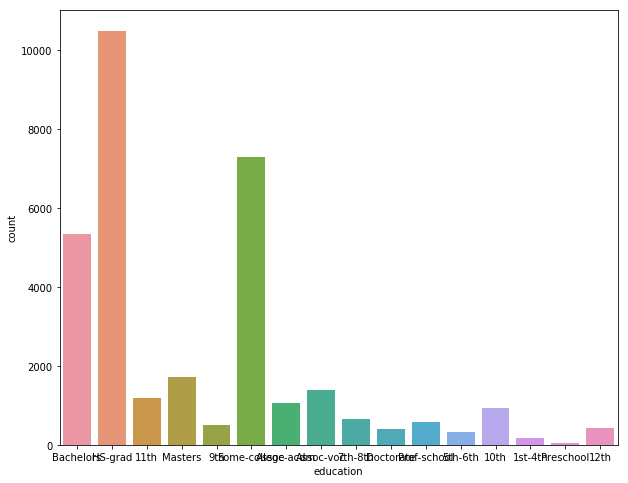

In [15]:
# Make a population histogram (bar plot) of people's education (education feature).

sns.countplot(x='education',data=df)

In [17]:
#What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and 
#those who earn less than 50K per year?

df.groupby(df['salary'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


In [21]:
#Is it true that people who earn more than 50K have at least high school education? 
# (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature) -- False

pd.crosstab(df['education'],df['salary'])

salary,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [23]:
#Display age statistics for each race (race feature) and each gender (sex feature). 
#Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race. -- 82

df.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

In [33]:
#Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? 
#Consider as married those who have a marital-status starting with Married 
#(Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.



Singles    32561
Name: marital-status, dtype: int64

In [35]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [36]:
status = {'Married-civ-spouse':'Married','Married-spouse-absent':'Married','Married-AF-spouse':'Married',
         'Never-married':'Singles','Divorced':'Singles','Separated':'Singles','Widowed':'Singles'}
df['marital-status'] = df['marital-status'].map(status)

In [37]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Singles,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Singles,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
pd.crosstab(df['salary'],df['marital-status'],normalize=True)

marital-status,Married,Singles
salary,,
<=50K,0.266607,0.492583
>50K,0.206873,0.033936


In [96]:
# What is the maximum number of hours a person works per week (hours-per-week feature)? 
# How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

ct1 = pd.crosstab(df['hours-per-week'],df['salary']).tail()


per = (ct1.iloc[-1,1])/(ct1.iloc[-1,0] + ct1.iloc[-1,1])

per



0.29411764705882354

In [74]:
#Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). 
#What will these be for Japan?

df1  = df.pivot_table(['hours-per-week'],['native-country','salary'],aggfunc='mean')
df2 = df1.reset_index()


df2.loc[df2['native-country']=='Japan']
  


,native-country,salary,hours-per-week
47,Japan,<=50K,41.000000
48,Japan,>50K,47.958333
